# Notebook for visualising AU-SAR Gridded DM Winds

## Load python packages

In [ ]:
%reset -f    

In [3]:
import os, glob
import sys    
import cartopy as cart
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from siphon.catalog import TDSCatalog
import xarray as xr

In [7]:
from datetime import date, timedelta
from os.path import exists
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [5]:
def savefig(fig, filename, dpi = 300):
    """Save a fig with 0 padding.
       Args:
           - fig (matplotlib.figure.Figure): a figure object
           - filename (str): path and filename to save
    """
    try:
        fig.savefig(filename, bbox_inches = 'tight', pad_inches = 0.1, dpi = dpi)
    except:
        sys.exit('Figure: {0:s} could not be saved.'.format(filename))
pass


In [6]:
contour_clrs = np.array(([212, 212, 212],
                      [170,170,170],
                      [129,129,129],
                      [88,88,88],
                      [181,209,228],
                      [127,165,199],
                      [73,121,170],
                      [20, 77, 141],
                      [177, 220, 173],
                      [126,179,130],
                      [75,138,87],
                      [25,97, 45],
                      [254, 253, 174],
                      [245,186,129],
                      [237,119,84],
                      [229, 52, 39],
                      [246, 10, 29],
                      [190, 57, 194]))/255.0
levels = np.array((0, 1, 2, 3, 4, 5, 6.5, 8, 9.5, 11, 12.5, 14, 15.5, 17.5, 19.5, 21.5, 25, 30))
land_clr = (247/255, 206/255, 160/255)


## Open and plot gridded SAR winds
</br>
For now, this assumes data is available inside a local directory and can be updated later to use appropriate source location

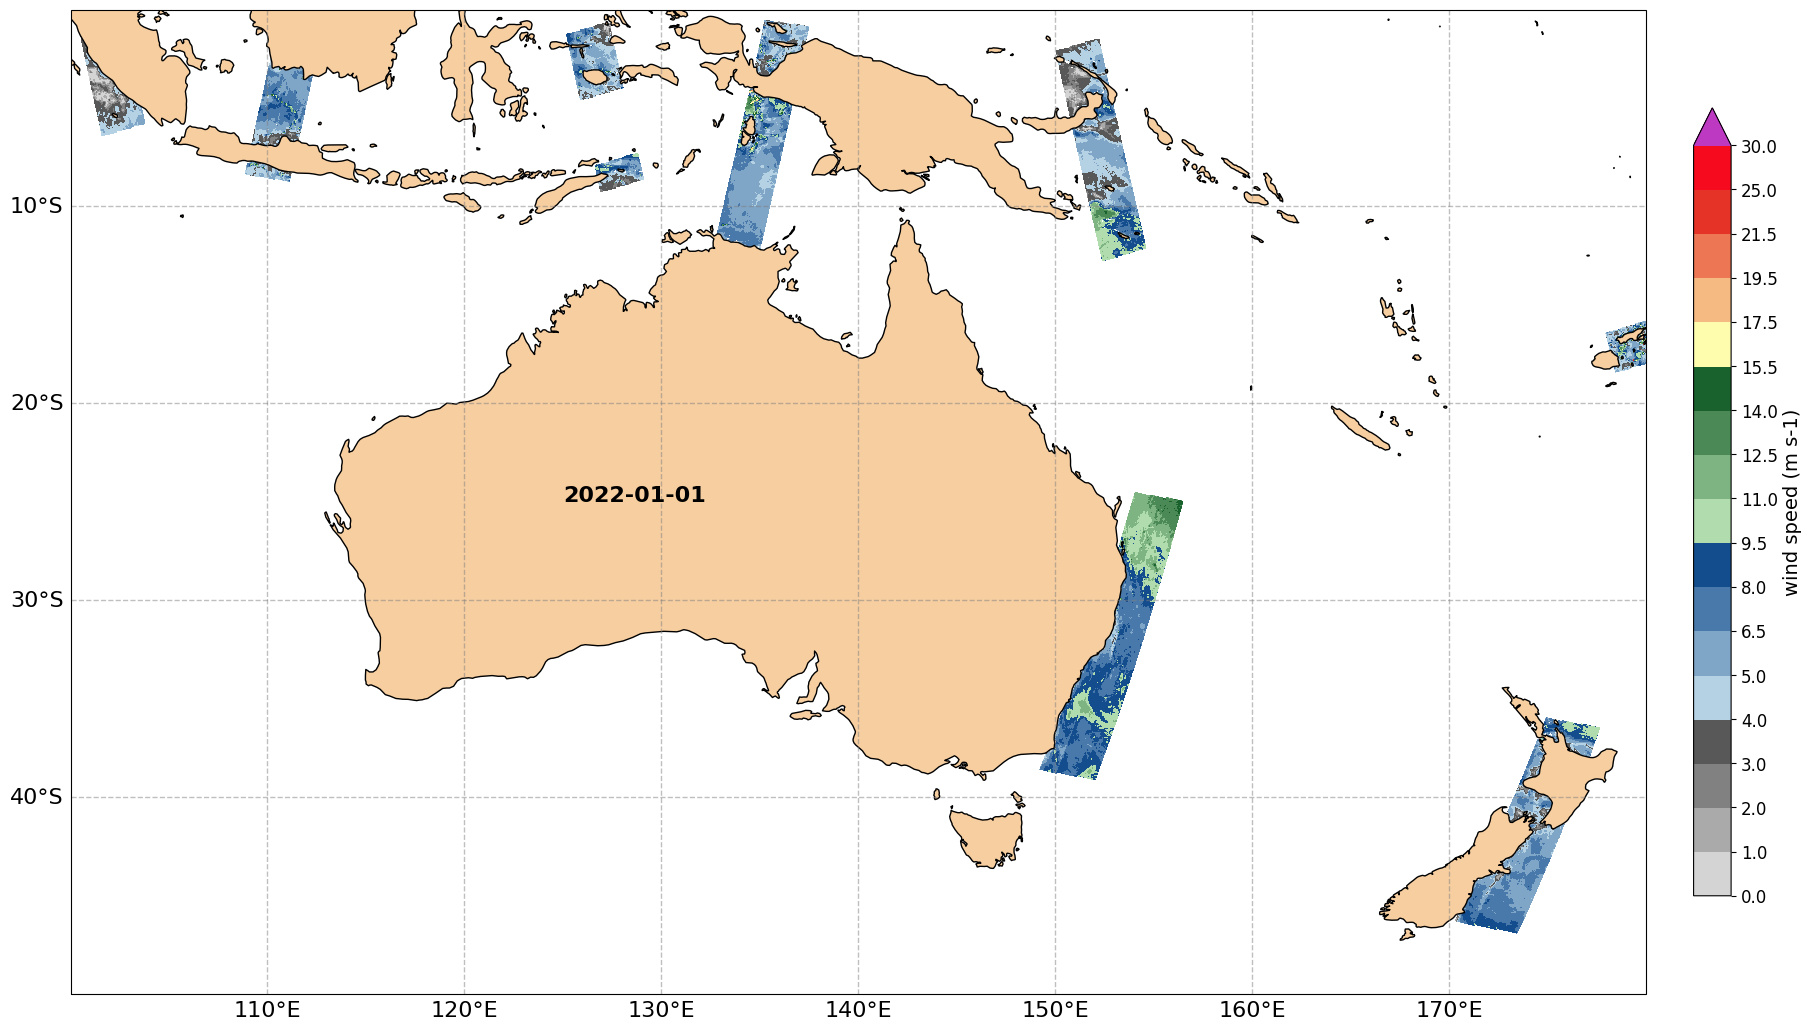

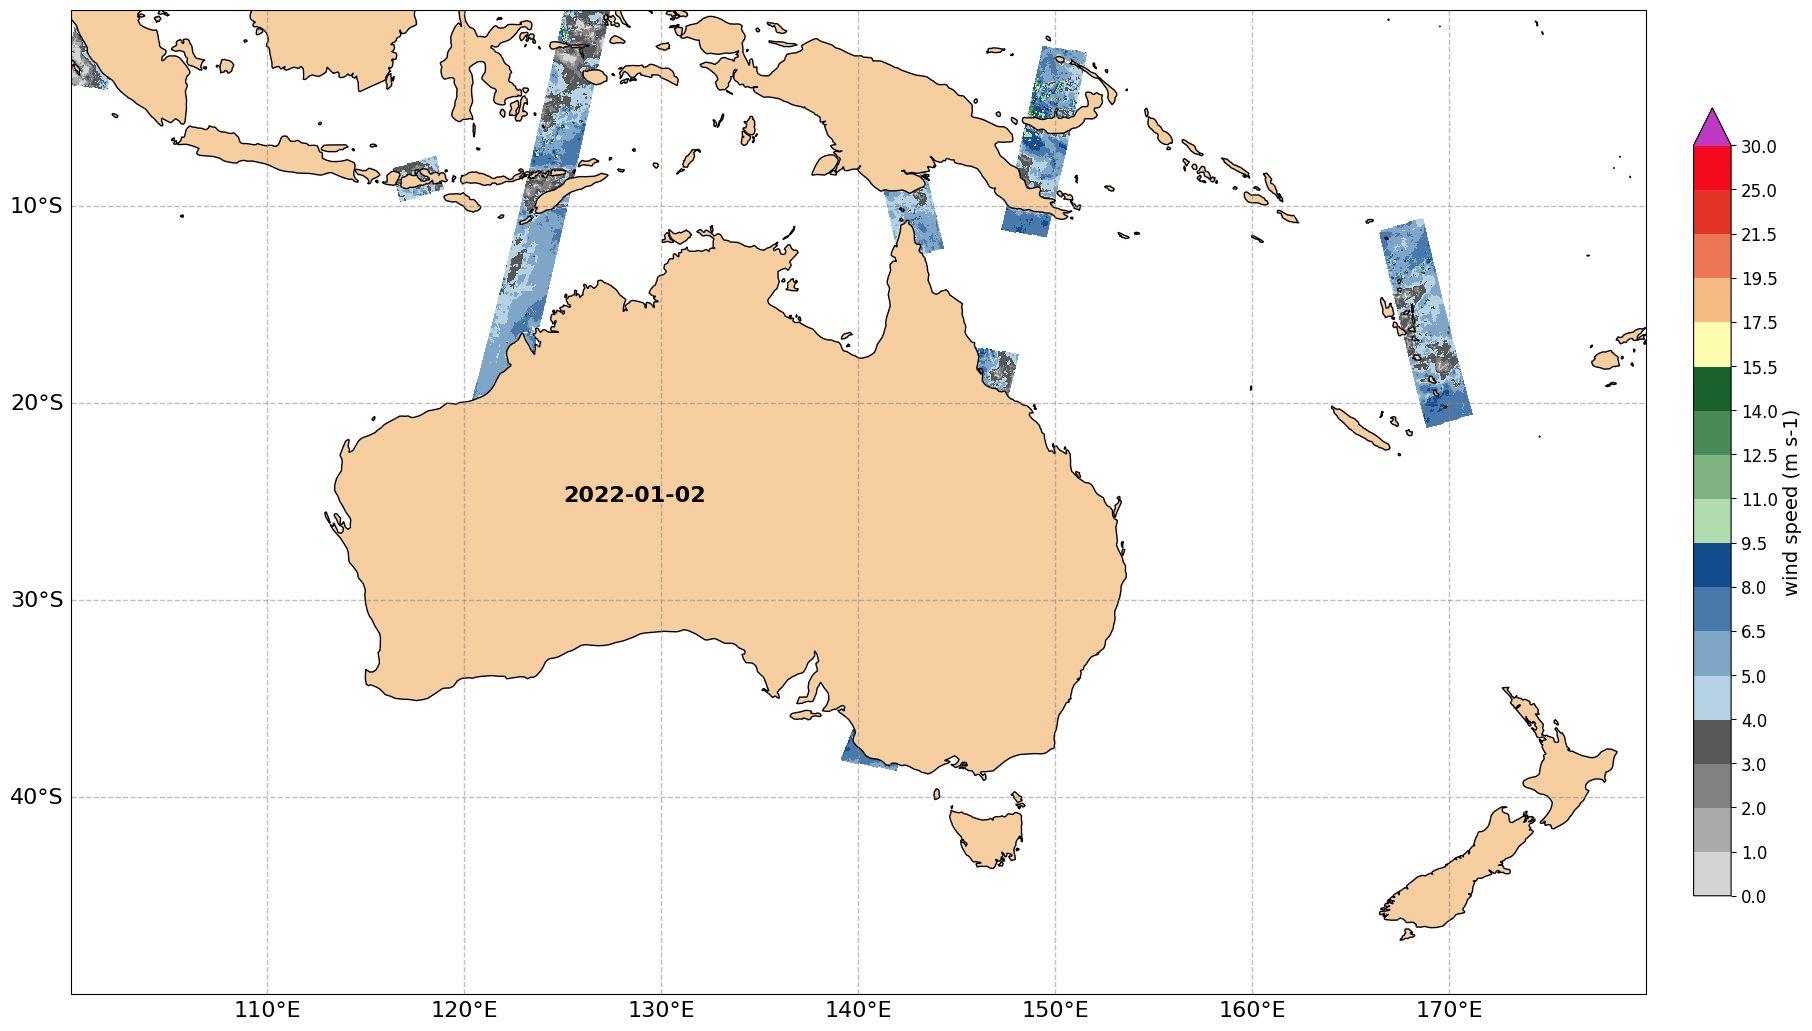

Done


In [18]:
# Define some variables for plotting sample file
start_date = date(2022, 1, 1) 
end_date = date(2022, 1, 2)
delta = timedelta(days=1)
cb_label = 'wind speed (m $ \mathregular{s{^{-1}}}$)'

# Set extent of the map for plotting
extent = (-80, 0, 0, -50)


# 
while start_date <= end_date:        
    if exists('/directory/IMOS_SRS-Surface-Waves_M_{0}_Gridded-Coastal-Wind-Sentinel-1_FV02.nc'.format(start_date.strftime("%Y%m%d"))):
        dset = xr.open_dataset('/directory/IMOS_SRS-Surface-Waves_M_{0}_Gridded-Coastal-Wind-Sentinel-1_FV02.nc'.format(start_date.strftime("%Y%m%d")), mask_and_scale = True, decode_times = False)

        # Create the figure
        fig = plt.figure(figsize = (20, 20))
        ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m'), edgecolor='k', facecolor=land_clr, linewidth=1)

        # Add grid lines
        gl = ax.gridlines(crs = ccrs.PlateCarree(), 
                          draw_labels = True, 
                          linewidth = 1, 
                          color = 'gray', 
                          alpha = 0.5, 
                          linestyle = '--')
        
        # Set axis labels and style
        gl.xlabel_style = {'fontsize': 16}
        gl.ylabel_style = {'fontsize': 16}
        gl.top_labels = None
        gl.right_labels = None
        
        # Set uniform map extent 
        ax.set_extent(extent, 
                      cart.crs.PlateCarree(central_longitude = 180))

        # Add data contour: CALIBRATED WIND SPEED
        cs = ax.contourf(dset['LONGITUDE'], 
                         dset['LATITUDE'], 
                         dset['WSPD_CAL'], 
                         levels = levels, 
                         transform = ccrs.PlateCarree(), 
                         extend = 'max',
                         colors = contour_clrs)
        
        # Add colour bar
        cbar = fig.colorbar(cs, 
                            ax = ax, 
                            orientation = 'vertical', 
                            label = 'wind speed (m s-1)', 
                            aspect = 20,
                            shrink = 0.4, 
                            pad = 0.025)
        cbar.ax.tick_params(labelsize = 12)
        cbar.set_label(label = 'wind speed (m s-1)', size = 14)
        cbar.set_ticks(levels)
        cbar.set_ticklabels(levels)
        
        # Add date label on the map
        ax.text(125, -25, 
                start_date.strftime("%Y-%m-%d"), 
                fontdict = {'fontsize': 16, 'fontweight': 'bold'});
        
        fig.tight_layout();
        
        ## Option to save the figure to a file
        # savefig(fig, '/output_directory/wspdcal/{}_wspdcal.png'.format(start_date.strftime("%Y%m%d")), dpi=100)
        
        ## Close figure each time
        # plt.close(fig)
        
        plt.show()
        
        
    start_date += delta

print('Done')